In [3]:
import pandas as pd
import numpy as np
import os, fnmatch, re, cv2, random,sys, pickle
import torch
#import imgaug as ia
#import imageio
%matplotlib inline  
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from torch.utils import data
from torchvision import transforms
import torch.nn as nn
sys.path.append('..')

root_locEm = "../"
root_datasets = "../../../../datasets/"
root_ImageNetVidsDevkit = root_datasets+"ImageNetVids/imageNetVidsDevkit.data/"
root_ImageNetVids = root_datasets+"ImageNetVids/imageNetVids.data/"
path_to_frames= root_ImageNetVids+"Data/VID/train/"
path_to_val_frames= root_ImageNetVids+"Data/VID/val/"
path_to_annotations= root_ImageNetVids+"Annotations/VID/train/"

image_size = 448
map_vid = pd.read_pickle("../data/map_vid.pkl")

In [4]:
def showTorchTensorImg(img):
    
    #assert img is a torch of size nchw
    return plt.imshow(img.permute(1,2,0).numpy())

In [5]:
from genINV_Locem_v2 import ImageNetVID
from torch.utils.data import DataLoader

In [6]:
def collate_fn(data):

    '''print("TYPE DATA COLLATE",type(data))
    print("LEN DATA COLLATE",len(data))
    print("type data[0]",type(data[0][0]))
    print("type data[1]",type(data[0][1]))
    print("type data[2]",type(data[0][2]))'''

    #sys.exit(0)
    '''images = torch.tensor(np.transpose(data[0][0],(2,0,1)))
    bboxes = torch.tensor(data[0][1])'''

    n = len(data[0])
    out = []

    for i in range(n):
        out.append(data[0][i])

    return out

In [7]:
train_dataset = "../data/metadata_imgnet_vid_train_n2.pkl"
val_dataset = "../data/metadata_imgnet_vid_val_n2.pkl"
root_datasets = "/disk/shravank/datasets/"
gen_train = ImageNetVID(root_datasets,train_dataset,split='train',image_size=image_size,S=7,B=2,C=30,X=5,gamma=1)
gen_val = ImageNetVID(root_datasets,val_dataset,split='val',image_size=image_size,S=7,B=2,C=30,X=5,gamma=1)
train_loader = DataLoader(gen_train,batch_size=1,shuffle=True,collate_fn=collate_fn)
val_loader = DataLoader(gen_val,batch_size=64,collate_fn=collate_fn)

USING v101 of generator
Invoking augmentor
USING v101 of generator
Invoking augmentor
train Length of the dataset to traverse 10
train Length of the dataset to traverse 10


In [31]:
!ls ../data/

map_vid.pkl			  metadata_imgnet_vid_val_n1.pkl
metadata_imgnet_vid_train_n1.pkl  metadata_imgnet_vid_val_n2.pkl
metadata_imgnet_vid_train_n2.pkl  metadata_imgnet_vid_val_n4.pkl
metadata_imgnet_vid_train_n4.pkl  metadata_imgnet_vid_val_new.pkl
metadata_imgnet_vid_train.pkl	  metadata_imgnet_vid_val.pkl


In [39]:
vd = pd.read_pickle('../data/metadata_imgnet_vid_val_new.pkl')
vd

,cat_code,snip_id,folder,file,width,height,wnid,trackid,xmax,xmin,ymax,ymin
0,19,00042009,ILSVRC2015_val_00042009,000028,640,480,n03790512,0,439,373,383,322
1,19,00042009,ILSVRC2015_val_00042009,000004,640,480,n03790512,0,373,315,320,258
2,19,00042009,ILSVRC2015_val_00042009,000035,640,480,n03790512,0,400,338,383,326
3,19,00042009,ILSVRC2015_val_00042009,000018,640,480,n03790512,0,488,425,367,298
4,19,00042009,ILSVRC2015_val_00042009,000031,640,480,n03790512,0,424,356,391,328
...,...,...,...,...,...,...,...,...,...,...,...,...
273500,8,00035008,ILSVRC2015_val_00035008,000081,1280,720,n02402425,1,1046,729,507,258
273501,8,00035008,ILSVRC2015_val_00035008,000204,1280,720,n02402425,0,364,107,631,376
273502,8,00035008,ILSVRC2015_val_00035008,000204,1280,720,n02402425,1,982,669,524,266
273503,8,00035008,ILSVRC2015_val_00035008,000034,1280,720,n02402425,0,608,353,577,339


In [40]:
from collections import defaultdict
vd_dict = defaultdict(list)

In [41]:
for i,x in enumerate(vd.index):
    row = vd.loc[i]
    vd_dict[(row.folder,row.file)].append([row.cat_code,row.snip_id,row.trackid,row.xmin,row.ymin,row.xmax,row.ymax])

In [42]:
len(vd_dict)

172080

In [43]:
pickle.dump(vd_dict, open("../data/metadata_imgnet_vid_folderFile_val.pkl", "wb" ) )

In [45]:
lvd = pickle.load(open("../data/metadata_imgnet_vid_folderFile_val.pkl","rb"))

In [46]:
len(lvd)

172080

In [50]:
getOtherObjects2(vd.loc[0],lvd)


([], [])

In [ ]:
time_oldget = '36.79s user 5.33s system 284% cpu 14.805 total'
time_noget = '29.95s user 5.18s system 240% cpu 14.590 total'
time_newget = '33.64s user 5.68s system 222% cpu 17.683 total'

In [33]:
ai,pi,ni,ab,pb,nb = [],[],[],[],[],[]

In [34]:
for i,(ani,psi,ngi,anb,psb,ngb) in enumerate(train_loader):
    ab = anb
    pb = psb
    nb = ngb
    ai = ani
    pi = psi
    ni = ngi
    break

train Length of the dataset to traverse 15806
sample.folder ILSVRC2015_VID_train_0000/ILSVRC2015_train_00010011
sample.file 000017
sample.folder ILSVRC2015_VID_train_0000/ILSVRC2015_train_00010011
sample.file 000039
sample.folder ILSVRC2015_VID_train_0000/ILSVRC2015_train_00119045
sample.file 000027
im size (1080, 1740, 3)
im size (1080, 1597, 3)
im size (720, 1036, 3)
torch.Size([1, 4])
torch.Size([1, 4])
torch.Size([1, 4])


In [35]:
bxs = [ab,pb,nb]
imgs = [ai,pi,ni]

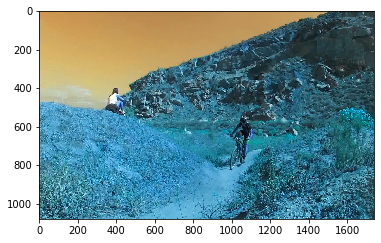

In [36]:
plt.imshow(imgs[0])

box len 1
torch.Size([4])
616 248 674 353


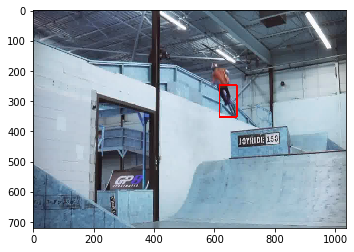

In [41]:
ids = 2
i1 = imgs[ids]
box = bxs[ids]
print('box len',len(box))
for b in box:
    print(b.view(-1).size())
    x1,y1,x2,y2 = b.view(-1).numpy()
    x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)
    print(x1,y1,x2,y2)
    cv2.rectangle(i1,(x1,y1),(x2,y2),(255,0,0),3)
plt.imshow(i1)

In [38]:
bxs[2]

tensor([[616.8932, 248.0000, 674.3728, 353.0000]])

In [12]:
x1,y1,x2,y2 = bxs[2]

In [ ]:
td = pd.read_pickle(train_dataset)
td.loc[0]

In [ ]:
all_data = pd.read_pickle('../data/metadata_imgnet_vid_train.pkl')

In [ ]:
def getOtherObjects(sample,all_data):
    
        boxes = []
        classes = []
        
        other_samples = all_data[(all_data.folder==sample.folder)&(all_data.file==sample.file)]
        #If there is only 1 object in image then there is nothing to add
        if len(other_samples)==1:
            return [],[]
        #Dropping sample from other
        other_samples = other_samples[other_samples.trackid!=sample.trackid]
        
        for idx in other_samples.index:
            row = other_samples.loc[idx]
            boxes.append([row.xmin,row.ymin,row.xmax,row.ymax])
            classes.append([row.cat_code-1])
        
        boxes = torch.tensor(boxes,dtype=torch.float)
        classes = torch.tensor(classes,dtype=torch.float)
        
        return boxes,classes

In [ ]:
b,c = getOtherObjects(td.loc[0],all_data)
b,c

In [ ]:
x = [[1,2,3],[4,5,6]]
y = [[1,2,3]]
z = [[1,2,3],[4,5,6]]

In [ ]:
pb = torch.rand((1,4))
pb

In [ ]:
opb = [[1,2,3,4],[1,2,3,4]]
opb = torch.tensor(opb,dtype=torch.float)
opb

In [ ]:
pb.size(),opb.size()

In [ ]:
tpb = torch.cat([pb,opb],dim=0)
tpb

In [ ]:
tpb.size()

In [ ]:
tpb/(torch.tensor([2,2,2,2],dtype=torch.float)).view(1,-1)

In [ ]:
d = tpb/((torch.tensor([2,2,2,2],dtype=torch.float)).view(1,-1))
d

In [ ]:
(torch.tensor([2,2,2,2],dtype=torch.float)).size()

In [ ]:
vald = pd.read_pickle(val_dataset)
vald[:10]

In [ ]:
sample = vald.loc[2616]
vd_sam = vald[(vald.cat_code==sample.cat_code)& (vald.snip_id==sample.snip_id) & (vald.trackid==sample.trackid)]
vd_sam

In [ ]:
s1 = cv2.imread(path_to_val_frames+'ILSVRC2015_val_00035008'+'/'+'000192'+'.JPEG')
s1 = cv2.rectangle(s1, (596,20), (931,136), (255,0,0), 2)
plt.imshow(s1)

In [ ]:
s2 = cv2.imread(path_to_val_frames+'ILSVRC2015_val_00035008'+'/'+'000188'+'.JPEG')
s2 = cv2.rectangle(s2, (716,13), (1032,120), (255,0,0), 2)
plt.imshow(s2)

In [ ]:
small_car = ad[(ad.cat_code==sample.cat_code)& (ad.snip_id==sample.snip_id) & (ad.trackid==sample.trackid)]
small_car

In [ ]:
vd = pd.read_pickle(val_dataset)
ad = pd.read_pickle('../data/metadata_imgnet_vid_val.pkl')

In [ ]:
!ls ../data/

In [ ]:
snip = vd[vd.snip_id=='00044024']
snip

In [ ]:
snip_ad = ad[(ad.snip_id=='00023002')&(ad.file=='000026')]
snip_ad

In [ ]:

sam = vd[(vd.snip_id=='00023002')&(vd.file=='000026')]
sample = sam.loc[2224]
sam

In [ ]:
sample_img = cv2.imread(path_to_val_frames+sample.folder+'/'+sample.file+'.JPEG')

In [ ]:
plt.imshow(sample_img)

In [ ]:

#pt1 = (sample.xmin,sample.ymin)
#pt2 = (sample.xmax,sample.ymax)

#Predicted car
#(tensor(270.0915), tensor(98.6256)), (tensor(554.2518), tensor(248.4254)))
pt1 = (270,98)
pt2 = (554,248)


#bus

#pt1 = (421,140)
#pt2 = (575,294)
# Blue color in BGR 
color = (0, 255, 0) 
  
# Line thickness of 2 px 
thickness = 2
  
# Using cv2.rectangle() method 
# Draw a rectangle with blue line borders of thickness of 2 px 
image = cv2.rectangle(sample_img, pt1, pt2, color, thickness)
plt.imshow(image)

In [ ]:
for idx in snip_ad.index:
    row = snip_ad.loc[idx]
    pt1 = (row.xmin,row.ymin)
    pt2 = (row.xmax,row.ymax)
    image = cv2.rectangle(sample_img, pt1, pt2, color, thickness)

plt.imshow(image)

In [ ]:
sample_img = cv2.imread(path_to_val_frames+sample.folder+'/'+sample.file+'.JPEG')
plt.imshow(sample_img)

In [ ]:
si = cv2.resize(sample_img, dsize=(224, 224), interpolation=cv2.INTER_LINEAR)
plt.imshow(si)

In [ ]:
w,h=sample.width,sample.height
pt1 = (int(270/w),int(98/h))
pt2 = (int(554/w),int(248/h))
pt1,pt2,w,h

In [ ]:
image = cv2.rectangle(si, pt1, pt2, color, thickness)
plt.imshow(image)

In [ ]:
map_cat = map_vid.to_dict()['category_name']

In [ ]:
def getOtherObjects(sample,all_data):
    
        boxes = []
        #filenames = []
        classnames = []
        uids = []

        
        other_samples = all_data[(all_data.folder==sample.folder)&(all_data.file==sample.file)]
        print(other_samples)
        #If there is only 1 object in image then there is nothing to add
        if len(other_samples)==1:
            return [],[],[]
        #Dropping sample from other
        other_samples = other_samples[(other_samples.trackid!=sample.trackid)]
        
        print(other_samples)
        
        for idx in other_samples.index:
            row = other_samples.loc[idx]
            boxes.append([row.xmin,row.ymin,row.xmax,row.ymax])
            #filenames.append(row.file)
            classnames.append(map_cat[row.cat_code-1])
            print(map_cat[row.cat_code-1])
            #uid = self.unique_keys[
            #(self.unique_keys.cat_code==row.cat_code) & (self.unique_keys.snip_id==row.snip_id) & (self.unique_keys.trackid==row.trackid)
            #].index.to_numpy()
            #uids.append(int(uid))
        
        #boxes = torch.tensor(boxes,dtype=torch.float)
        #classes = torch.tensor(classes,dtype=torch.float)
        
        return boxes,classnames,uids

In [ ]:
b,c,u = getOtherObjects(sample,ad)
c

In [ ]:
all_data = ad
other_samples = all_data[(all_data.folder==sample.folder)&(all_data.file==sample.file)]
other_samples

In [ ]:
def collate_fn(data):

    '''print("TYPE DATA COLLATE",type(data))
    print("LEN DATA COLLATE",len(data))
    print(len(data[0]))
    #print(data[0][0].size())
    print(type(data[0][0]))
    print(type(data[0][1]))
    print(type(data[0][2]))
    print(type(data[0][3]))
    sys.exit(0)'''
    
    n = len(data[0])
    print('n',n)
    out = []

    for i in range(n):
        out.append(data[0][i])

    return out

In [ ]:
def collate_fn(data):
        
    images_list,target_list = [],[]
    batch_size = len(data)
    
    for batch in range(batch_size):
        images_list.append(data[batch][0])
        target_list.append(data[batch][1])
    
    images = torch.cat(images_list,dim=0)
    targets = torch.cat(target_list,dim=0)
    
    return images,targets

In [ ]:
train_loader = DataLoader(gen_train,batch_size=1,shuffle=True,collate_fn=collate_fn)
val_loader = DataLoader(gen_val,batch_size=1,shuffle=False,collate_fn=collate_fn)

In [ ]:
for i, (image,bbox,classname,filename,ids) in enumerate(val_loader):
    print('image',image.shape)
    print('bbox',len(bbox))
    print('classname',classname)
    print('filename',filename)

    print("TYPES")

    print('image',len(image))
    print('bbox',len(bbox))
    print('classname',len(classname))
    print('filename',len(filename))
    
    print(len(ids))
    break
    '''for b in range(len(bbox)):

                x1,y1,x2,y2 = bbox[b]
                targets_ev[(filename[b],classname[b])].append([x1,y1,x2,y2])'''

In [ ]:
def showTorchTensorImg(img):
    
    #assert img is a torch of size nchw
    return plt.imshow(img.permute(1,2,0).numpy())

In [ ]:
imgs,tgt = [],[]
for i,(images,target) in enumerate(train_loader):
    imgs = images
    tgt = target
    print('Images size',images.size())
    print('Target size',target.size())
    break

In [ ]:
S=7 
B=2
X=5
C=30
beta=64

In [ ]:
from torch.nn import functional as F

In [ ]:
a = torch.rand(2,3)
a

In [ ]:
F.normalize(a,p=2)

In [ ]:
l2 = F.normalize(a,p=2)
l2

In [ ]:
s = torch.sigmoid(a)
s

In [ ]:
from r50_locem import resnet50

In [ ]:
model = resnet50()

In [ ]:
model =resnet50(pretrained=True)

In [ ]:
o1 = model(images)

In [ ]:
o1.size()

In [ ]:
o1[0,0,0,40:]

In [ ]:
o1f = F.normalize(o1[:,:,:,40:],p=2)
o1f[0,0,0,40:]

In [ ]:
o1f.size()

In [ ]:
o1[0,0,0,40:].size()

In [ ]:
o1f[0,0,0,40:].size()

In [ ]:
print(model)

In [ ]:
r = nn.ReLU()

In [ ]:
k = torch.randint(low=-5,high=5,size=(1,4),dtype=torch.float)
k

In [ ]:
p = torch.randn((1,4))
p

In [ ]:
p = F.normalize(p,p=2)
p


In [ ]:
o = torch.zeros((1,4))
o

In [ ]:
F.cosine_similarity(p,p)

In [ ]:
import random

In [ ]:
random.random()

In [ ]:
from r50_locem import resnet101

In [ ]:
model =resnet101(pretrained=True)

In [ ]:
dt = pd.read_pickle('../../data/metadata_imgnet_vid_val_n2.pkl')

In [ ]:
dataset = pd.DataFrame(dt)
unique_ids = dataset.drop_duplicates(subset=['cat_code','snip_id','trackid'],keep='first')
unique_ids = unique_ids.reset_index(drop=True)
unique_ids = unique_ids.drop(labels=['folder','file','width','height','wnid','xmax','xmin','ymax','ymin'],axis=1)

In [ ]:
unique_ids

In [ ]:
ans = unique_ids[(unique_ids.cat_code==9) & (unique_ids.snip_id=='00102000') & (unique_ids.trackid==0)].index.to_numpy()
ans = int(ans)
ans

In [ ]:
s = unique_ids.loc[0]
s

In [ ]:
unique_ids[(unique_ids.cat_code==s.cat_code) & (unique_ids.snip_id==s.snip_id) & (unique_ids.cat_code==s.trackid)]

In [ ]:
from r50_locem import resnet50

In [ ]:
model = resnet50(pretrained=True,S=4,B=2,C=30,X=5)

In [ ]:
import torch
imgs = torch.rand((5,3,448,448))

In [ ]:
out = model(imgs)

In [ ]:
out.size()

In [ ]:
def compute_iou(bbox1, bbox2):
        '''
        Compute the IoU (Intersection over Union) of two set of bboxes, each bbox format: [x1, y1, x2, y2].
        Args:
            bbox1: (Tensor) bounding bboxes, sized [N, 4].
            bbox2: (Tensor) bounding bboxes, sized [M, 4].
        Returns:
            (Tensor) IoU, sized [N, M].
        '''

        '''print('bbox1 size',bbox1.size())
        print('bbox2 size',bbox2.size())
        print('bbox1',bbox1)
        print('bbox2',bbox2)
        sys.exit(0)'''


        N = bbox1.size(0)
        M = bbox2.size(0)

        # Compute left-top coordinate of the intersections
        lt = torch.max(
            bbox1[:, :2].unsqueeze(1).expand(N, M, 2), # [N, 2] -> [N, 1, 2] -> [N, M, 2]
            bbox2[:, :2].unsqueeze(0).expand(N, M, 2)  # [M, 2] -> [1, M, 2] -> [N, M, 2]
        )
        # Conpute right-bottom coordinate of the intersections
        rb = torch.min(
            bbox1[:, 2:].unsqueeze(1).expand(N, M, 2), # [N, 2] -> [N, 1, 2] -> [N, M, 2]
            bbox2[:, 2:].unsqueeze(0).expand(N, M, 2)  # [M, 2] -> [1, M, 2] -> [N, M, 2]
        )
        # Compute area of the intersections from the coordinates
        wh = rb - lt   # width and height of the intersection, [N, M, 2]
        wh[wh < 0] = 0 # clip at 0
        inter = wh[:, :, 0] * wh[:, :, 1] # [N, M]

        # Compute area of the bboxes
        area1 = (bbox1[:, 2] - bbox1[:, 0]) * (bbox1[:, 3] - bbox1[:, 1]) # [N, ]
        area2 = (bbox2[:, 2] - bbox2[:, 0]) * (bbox2[:, 3] - bbox2[:, 1]) # [M, ]
        area1 = area1.unsqueeze(1).expand_as(inter) # [N, ] -> [N, 1] -> [N, M]
        area2 = area2.unsqueeze(0).expand_as(inter) # [M, ] -> [1, M] -> [N, M]

        # Compute IoU from the areas
        union = area1 + area2 - inter # [N, M, 2]
        iou = inter / union           # [N, M, 2]

        return iou

In [ ]:
b1 = [[1,2,2,3]]
b1 = torch.tensor(b1,dtype=torch.float)
b2 = [[1,2,2,3]]
b2 = torch.tensor(b2,dtype=torch.float)
b1,b2

In [ ]:
compute_iou(b1,b2)

In [ ]:
b1 = [[1,3,2,2]]
b1 = torch.tensor(b1,dtype=torch.float)
b2 = [[1,3,2,2]]
b2 = torch.tensor(b2,dtype=torch.float)
b1,b2

In [ ]:
compute_iou(b1,b2)